## Experiments: RSAST per dataset type

In [314]:
import sys 
import os 
#add sast library path
file_path = os.path.dirname(os.getcwd())+"/sast"

#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.path.dirname(os.getcwd())+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

#add cd_diagram library path
file_path = os.path.dirname(os.getcwd())+"\cd_diagram"

#file_path = r"C:\Users\Public\random_sast\cd_diagram"
sys.path.append(file_path)


file_path = os.path.dirname(os.getcwd())+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

sys.path


['/home/nirojasvar/random_sast/ExperimentationRSAST',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python310.zip',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/lib-dynload',
 '',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages',
 '/home/nirojasvar/random_sast/sast',
 '/home/nirojasvar/random_sast\\sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\sast',
 '/home/nirojasvar/random_sast\\cd_diagram',
 '/home/nirojasvar/random_sast/cd_diagram',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\cd_diagram',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/cd_diagram',
 '/home/nirojasvar/random_sast/sast',
 '/home/nirojasvar/random_sast\\sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\sast',
 '/home/nirojasvar/random_sast\\cd_diagram',
 '/home/nir

In [315]:
from sast import *
from sktime.datasets import load_UCR_UEA_dataset, tsc_dataset_names
from sktime.classification.kernel_based import RocketClassifier
import time
import pandas as pd
from sktime.transformations.panel.shapelet_transform import ShapeletTransform
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math
hyperparameter='ACF&PACF: n_random_points=10 nb_inst_per_class=10'

### Reading Datasets

In [316]:
# Set directory where the csv files are located
directory = os.getcwd()+'/ResultsByClassifier'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)

        # Append the dataframe to the list
        df['filename']=filename
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_other_methods = pd.concat(dfs, ignore_index=True)
df_other_methods=df_other_methods[['filename','folds:','0']]
df_other_methods['method']=df_other_methods['filename'].str.split('_').str[0]+"_AVRBC"
df_other_methods
df_other_methods=df_other_methods.rename(columns={'folds:':'dataset','0':'score'})
df_other_methods=df_other_methods[['dataset','score','method']]



In [317]:
# Set directory where the csv files are located

#filepath = os.getcwd()+'/singleTrainTest.csv'
filepath = os.getcwd()+'/Resamples.csv'
df = pd.read_csv(filepath)
df = df.melt(id_vars=["Unnamed: 0"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'Unnamed: 0':'dataset'})
df['method'] = df['method']+"_RES"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])
df_other_methods

,dataset,score,method
0,ArrowHead,0.594000,FS_AVRBC
1,Beef,0.567000,FS_AVRBC
2,BeetleFly,0.700000,FS_AVRBC
3,BirdChicken,0.750000,FS_AVRBC
4,Car,0.750000,FS_AVRBC
...,...,...,...
3225,Wine,0.912037,HIVE-COTE_RES
3226,WordSynonyms,0.747962,HIVE-COTE_RES
3227,Worms,0.734026,HIVE-COTE_RES
3228,WormsTwoClass,0.783896,HIVE-COTE_RES


In [318]:

# Set directory where the csv files are located
df_other_methods=df_other_methods[df_other_methods.method!="STC"]
filepath = os.getcwd()+'/SAST_TESTFOLDS.csv'
df = pd.read_csv(filepath)
df = df.rename(columns={'folds:':'dataset','STC':'score'})
df['method']="STC_MB"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])

In [319]:
# Set directory where the csv files are located

filepath = os.getcwd()+'/SAST_TESTFOLDS.csv'
df = pd.read_csv(filepath)
df = df.rename(columns={'folds:':'dataset','0':'score'})
df['method']="SAST"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])

In [320]:
df_other_methods['method'].unique()

array(['FS_AVRBC', 'ROCKET_AVRBC', 'ELIS++_AVRBC', 'HIVE-COTEv1_AVRBC',
       'LS_AVRBC', 'BOSS_AVRBC', 'RISE_AVRBC', 'TSF_AVRBC',
       'InceptionTime_AVRBC', 'TS-CHIEF_AVRBC', 'S-BOSS_AVRBC',
       'STC_AVRBC', 'ResNet_AVRBC', 'ProximityForest_AVRBC',
       'WEASEL_AVRBC', 'Catch22_AVRBC', 'cBOSS_AVRBC', 'NB_RES',
       'C45_RES', 'SVML_RES', 'SVMQ_RES', 'Logistic_RES', 'BN_RES',
       'RandF_RES', 'RotF_RES', 'MLP_RES', 'Euclidean_1NN_RES',
       'DTW_R1_1NN_RES', 'DTW_Rn_1NN_RES', 'DDTW_R1_1NN_RES',
       'DDTW_Rn_1NN_RES', 'ERP_1NN_RES', 'LCSS_1NN_RES', 'MSM_1NN_RES',
       'TWE_1NN_RES', 'WDDTW_1NN_RES', 'WDTW_1NN_RES', 'DD_DTW_RES',
       'DTD_C_RES', 'DTW_F_RES', 'ST_RES', 'LS_RES', 'FS_RES', 'BoP_RES',
       'SAXVSM_RES', 'BOSS_RES', 'TSF_RES', 'TSBF_RES', 'LPS_RES',
       'ACF_RES', 'PS_RES', 'EE_RES', 'CID_DTW_RES', 'Flat-COTE_RES',
       'HIVE-COTE_RES', 'STC_MB', 'SAST'], dtype=object)

In [321]:
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['SAST','STC_MB'])]
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['SAST','STC'])]
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['SAST'])]
df_other_methods=df_other_methods[df_other_methods['method'].isin(['ELIS++_AVRBC','LS_AVRBC','FS_AVRBC'])]
df_other_methods['method'].unique()

array(['FS_AVRBC', 'ELIS++_AVRBC', 'LS_AVRBC'], dtype=object)

In [322]:
# Set directory where the csv files are located
#directory = os.getcwd()+'/ResultsRsast'
#directory = os.getcwd()+'/results_accuracy_per_ds'

directories=[]
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST')
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST_All')
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST_Extra_1')
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST_Extra_2')
#directories.append(os.getcwd()+'/ResultsRsast/Server16_Hyperparameter_Tunning')
#directories.append(os.getcwd()+'/ResultsRsast/Server17_Hyperparameter_Tunning')
#directories.append(os.getcwd()+'/results_accuracy_per_ds')
#directories.append(os.getcwd()+'/results_accuracy_per_ds_10000')

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for directory in directories:
    for filename in os.listdir(directory):
        # Check if the file starts with "df_overall_tunning" and ends with ".csv"
        if filename.startswith("df_all_overall_tunning") and filename.endswith(".csv"):
            # Read the csv file into a dataframe
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            df['rpoint']=df['rpoint'].astype(str)
            df['nb_per_class']=df['nb_per_class'].astype(str)
            df['rpoint']=df['rpoint'].replace("(lenthg ts)//2","half_len")
            df['nb_per_class']=df['nb_per_class'].replace("(max instances per class)//2","half_instance")
            df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
            df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
            # Append the dataframe to the list
            dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_result = pd.concat(dfs, ignore_index=True)
# df_result.head(3)

/tmp/ipykernel_2930/2621841886.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_2930/2621841886.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_2930/2621841886.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_2930/2621841886.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_2930/2621841886.py:30: FutureWarning: The default value of rege

In [323]:
df_result=df_result[['accuracy','dataset_name','classifier_name','time']]

df_result=df_result[df_result["classifier_name"]==hyperparameter]

df_result.dataset_name.unique()

array(['MiddlePhalanxOutlineAgeGroup', 'FreezerSmallTrain', 'Wafer',
       'Earthquakes', 'Beef', 'DistalPhalanxOutlineAgeGroup', 'ECG200',
       'ShapeletSim', 'ItalyPowerDemand', 'ToeSegmentation2',
       'TwoLeadECG', 'ProximalPhalanxOutlineCorrect', 'CBF',
       'ToeSegmentation1', 'TwoPatterns', 'WordSynonyms', 'UMD',
       'Strawberry', 'FaceAll', 'GunPointMaleVersusFemale',
       'GunPointOldVersusYoung', 'PowerCons', 'SonyAIBORobotSurface2',
       'BirdChicken', 'ProximalPhalanxOutlineAgeGroup', 'Herring',
       'CricketY', 'FiftyWords', 'FreezerRegularTrain', 'Trace', 'Wine',
       'MiddlePhalanxOutlineCorrect', 'BeetleFly', 'FaceFour',
       'ProximalPhalanxTW', 'SwedishLeaf', 'SonyAIBORobotSurface1',
       'PhalangesOutlinesCorrect', 'ECG5000', 'GunPoint',
       'DodgerLoopWeekend', 'Meat', 'SmoothSubspace',
       'DiatomSizeReduction', 'CricketZ', 'CricketX',
       'ChlorineConcentration', 'ElectricDevices', 'Car',
       'GunPointAgeSpan', 'ECGFiveDays', 'Chi

In [324]:
len(df_result.dataset_name.unique())

71

In [325]:
df_other_methods=df_other_methods.rename(columns={"dataset":"dataset_name","score":"accuracy","method":"classifier_name"})
df_other_methods = df_other_methods[df_other_methods['dataset_name'].isin(df_result.dataset_name.values)]

df_other_methods


,dataset_name,accuracy,classifier_name
0,ArrowHead,0.594,FS_AVRBC
1,Beef,0.567,FS_AVRBC
2,BeetleFly,0.700,FS_AVRBC
3,BirdChicken,0.750,FS_AVRBC
4,Car,0.750,FS_AVRBC
...,...,...,...
321,SyntheticControl,0.997,LS_AVRBC
322,ToeSegmentation1,0.934,LS_AVRBC
323,ToeSegmentation2,0.915,LS_AVRBC
324,TwoLeadECG,0.996,LS_AVRBC


In [326]:
# concatenate the two dataframes
concatenated_df = pd.concat([df_other_methods, df_result])

# reset the index of the concatenated dataframe
concatenated_df = concatenated_df.reset_index(drop=True)

In [327]:
concatenated_df['classifier_name'].replace(hyperparameter,"RSAST",inplace=True)
hyperparameter="RSAST"


In [328]:
concatenated_df['classifier_name'].unique()

array(['FS_AVRBC', 'ELIS++_AVRBC', 'LS_AVRBC', 'RSAST'], dtype=object)

In [329]:
len(concatenated_df.dataset_name.unique())

71

In [330]:
uca_ds=pd.read_excel("DataSetsUCLASummary.xlsx")
uca_ds.columns

Index(['USED SAST', 'BAKE OFF', 'N RUNS S17_S16_HT', 'N RUNS S17_SAST_DS',
       'ID', 'Name', 'Type', 'Train ', 'Test ', 'Class', 'Length',
       'RSAST (10,10) WORST SAST?', 'O(|c|nm²)', 'O(|c|nm³)',
       'Approx Time (hours)', 'L25', 'L50', 'L75', 'ED (w=0)',
       'DTW (learned_w) ', 'DTW (w=100)', 'Default rate', 'Data donor/editor',
       '50/L', 'Unnamed: 24'],
      dtype='object')

In [331]:
concatenated_df=concatenated_df.merge(uca_ds, left_on=['dataset_name'],right_on=['Name'])
concatenated_df.columns

Index(['dataset_name', 'accuracy', 'classifier_name', 'time', 'USED SAST',
       'BAKE OFF', 'N RUNS S17_S16_HT', 'N RUNS S17_SAST_DS', 'ID', 'Name',
       'Type', 'Train ', 'Test ', 'Class', 'Length',
       'RSAST (10,10) WORST SAST?', 'O(|c|nm²)', 'O(|c|nm³)',
       'Approx Time (hours)', 'L25', 'L50', 'L75', 'ED (w=0)',
       'DTW (learned_w) ', 'DTW (w=100)', 'Default rate', 'Data donor/editor',
       '50/L', 'Unnamed: 24'],
      dtype='object')

In [332]:
df_result=df_result.merge(uca_ds, left_on=['dataset_name'],right_on=['Name'])
df_result.columns

Index(['accuracy', 'dataset_name', 'classifier_name', 'time', 'USED SAST',
       'BAKE OFF', 'N RUNS S17_S16_HT', 'N RUNS S17_SAST_DS', 'ID', 'Name',
       'Type', 'Train ', 'Test ', 'Class', 'Length',
       'RSAST (10,10) WORST SAST?', 'O(|c|nm²)', 'O(|c|nm³)',
       'Approx Time (hours)', 'L25', 'L50', 'L75', 'ED (w=0)',
       'DTW (learned_w) ', 'DTW (w=100)', 'Default rate', 'Data donor/editor',
       '50/L', 'Unnamed: 24'],
      dtype='object')

In [333]:
df_result=df_result[['accuracy','dataset_name','classifier_name','time','Type']]

In [334]:
concatenated_df=concatenated_df[['accuracy','dataset_name','classifier_name','time','Type']]

In [335]:
concatenated_df

,accuracy,dataset_name,classifier_name,time,Type
0,0.594000,ArrowHead,FS_AVRBC,NaN,Image
1,0.823000,ArrowHead,ELIS++_AVRBC,NaN,Image
2,0.846000,ArrowHead,LS_AVRBC,NaN,Image
3,0.782857,ArrowHead,RSAST,46.396603,Image
4,0.794286,ArrowHead,RSAST,42.915423,Image
...,...,...,...,...,...
452,0.826667,BME,RSAST,8.744131,Simulated
453,0.826667,BME,RSAST,8.839704,Simulated
454,0.833333,BME,RSAST,9.030892,Simulated
455,0.833333,BME,RSAST,8.888864,Simulated


### Overall analysis

#### Accuracy: RSAST vs Other methods

In [336]:
pv_all=pd.pivot_table(concatenated_df,index='dataset_name',values='accuracy',aggfunc="count")
ds_complete=pv_all[pv_all.accuracy==max(pv_all.accuracy)].reset_index().dataset_name.unique()
ds_complete
concatenated_df=concatenated_df[concatenated_df.dataset_name.isin(ds_complete)]

In [345]:
concatenated_df=concatenated_df[concatenated_df.dataset_name!="Fungi"]
df_perf=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
pd.pivot_table(df_perf, values='accuracy', index=['classifier_name'], aggfunc=['count','mean',"std"])

,count,mean,std
,accuracy,accuracy,accuracy
classifier_name,,,
ELIS++_AVRBC,34,0.860235,0.141391
FS_AVRBC,34,0.780735,0.146869
LS_AVRBC,34,0.817559,0.147207
RSAST,34,0.833080,0.135797


In [338]:
acc_per_type=pd.pivot_table(concatenated_df, values="accuracy", index=["dataset_name","Type",'classifier_name'])
#acc_per_type=concatenated_df
acc_per_type=acc_per_type.reset_index()

In [339]:
acc_per_type.columns

Index(['dataset_name', 'Type', 'classifier_name', 'accuracy'], dtype='object')

/tmp/ipykernel_2930/458891663.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


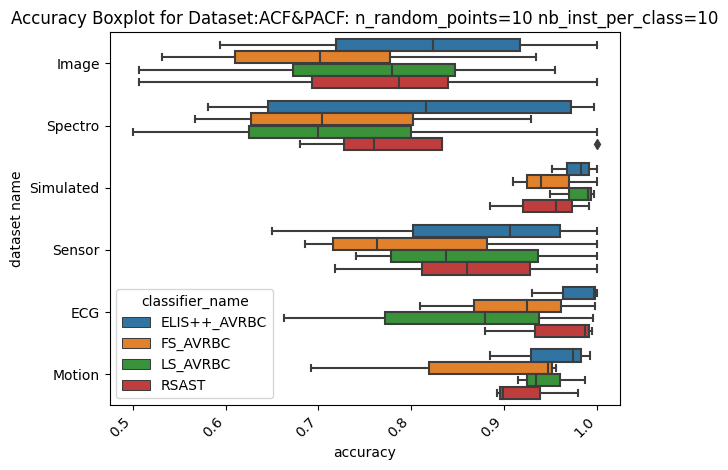

In [340]:
max_bx=max(acc_per_type.accuracy)
min_bx=min(acc_per_type.accuracy)


#df_to_cd=pd.pivot_table(df_to_cd, index=['dataset_name','classifier_name'], columns=['rpoint'],values='accuracy')
#df_to_cd = df_to_cd.reindex(columns=["1","10","30","50","100","half_len"])

#print(df_to_cd.head(5))

# Plot
fig, ax = plt.subplots()


#order=list(df_to_cd)
sns.boxplot(data=acc_per_type, y='Type', x='accuracy', hue ='classifier_name')
#plt.boxplot(df_to_cd, labels=list(df_to_cd), showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Axis details

ax.set(ylabel='dataset name', xlabel='accuracy', title='Accuracy Boxplot for Dataset:'+str(df_result["classifier_name"].unique()[0]))

#plt.xticks([1, 2, 3, 4, 5, 6],list(df_to_cd) )
#print(df_to_cd.describe())
plt.tight_layout()
# save plot
plt.savefig('images_boxplot_acc_per_type/boxplot_acc_per_type.png')

In [341]:
stats = acc_per_type.groupby(['Type','classifier_name'])['accuracy'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []
ci95_hi_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
    ci95_hi_lo.append(1.96*s/math.sqrt(c))

#stats['ci95_hi'] = ci95_hi
#stats['ci95_lo'] = ci95_lo
stats['ci95_interval'] = ci95_hi_lo
stats=pd.DataFrame(stats)
print(stats.round(2))

                           mean  count   std  ci95_interval
Type      classifier_name                                  
ECG       ELIS++_AVRBC     0.98      3  0.04           0.04
          FS_AVRBC         0.91      3  0.09           0.11
          LS_AVRBC         0.85      3  0.17           0.19
          RSAST            0.95      3  0.06           0.07
Image     ELIS++_AVRBC     0.81     15  0.14           0.07
          FS_AVRBC         0.71     15  0.13           0.07
          LS_AVRBC         0.76     15  0.13           0.07
          RSAST            0.76     15  0.15           0.07
Motion    ELIS++_AVRBC     0.95      3  0.06           0.07
          FS_AVRBC         0.86      3  0.15           0.17
          LS_AVRBC         0.95      3  0.04           0.04
          RSAST            0.92      3  0.05           0.06
Sensor    ELIS++_AVRBC     0.87      6  0.13           0.11
          FS_AVRBC         0.81      6  0.13           0.10
          LS_AVRBC         0.86      6  

In [342]:
# create a pivot table with the mean of score by hyperparameter
score_by_method=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'],columns=['Type'], aggfunc='count')

In [343]:
t_score_by_method=score_by_method.transpose()
t_score_by_method
t_score_by_method[[hyperparameter]].round(2)/5


classifier_name,RSAST
Type,
ECG,3.0
Image,15.0
Motion,3.0
Sensor,6.0
Simulated,3.0
Spectro,4.0
